# Amazon kindle store Reviews

In [1]:
import os
os.getcwd()

'C:\\Users\\gopia\\Desktop\\Gopi\\final project'

In [2]:
os.chdir(r"C:\Users\gopia\Desktop\Gopi\internship")


In [3]:
os.getcwd()

'C:\\Users\\gopia\\Desktop\\Gopi\\internship'

# Importing the libraries

In [4]:
import numpy as np #import numerical data
import pandas as pd #contains manipulate function
import matplotlib.pyplot as plt #matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.



# Importing the dataset 

In [5]:
data1 = pd.read_csv('reviews_book1.csv') #the data in the csv file is stored in data1
data1

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
14569,14569,B003ATPR4C,"[0, 0]",3,The book is very short and more pages are fill...,"08 28, 2013",A1XX88SJ23WEOY,"Lady Reader ""Marj""",More sex than story,1377648000
14570,14570,B003ATPR4C,"[0, 0]",5,Wonderful story can't wait for the next advent...,"08 6, 2013",A14ZDANVIG51R8,Leah Nelson,Wonderful story,1375747200
14571,14571,B003ATPR4C,"[0, 0]",5,Really enjoyed this short. Characters were we...,"03 27, 2013",A198SYM76YRZD9,LisaC,Fun short read!,1364342400
14572,14572,B003ATPR4C,"[2, 2]",5,"I really don't read paranormal books, this is ...","03 22, 2013",A3H7J5POTR9TZW,Liz,"Unleashed Temptation (Miami Scorcher, Book One)",1363910400


# Exploratory Data Analysis (EDA)

In [6]:
data1.groupby('overall')['summary'].describe()

,count,unique,top,freq
overall,,,,
1,645,613,Boring,7
2,862,822,Not my cup of tea,5
3,2054,1866,Good,15
4,4332,3712,Good,40
5,6681,5502,Loved it,35


In [7]:
data1.groupby('overall').overall.count()

overall
1     645
2     862
3    2054
4    4332
5    6681
Name: overall, dtype: int64

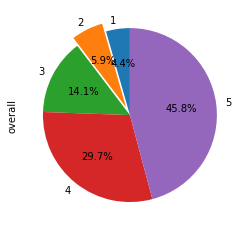

In [8]:
%matplotlib inline
data1.groupby('overall').overall.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [9]:
df=data1
df=df[['summary','overall']]
df=df[df['overall']!=3]
df=df.reset_index(drop=True)
df['sentiment']=np.where(df['overall'] > 3, 1, 0)
df

,summary,overall,sentiment
0,Nice vintage story,5,1
1,Different...,4,1
2,Oldie,4,1
3,I really liked it.,5,1
4,Period Mystery,4,1
...,...,...,...
12515,Beautiful!,5,1
12516,Wonderful story,5,1
12517,Fun short read!,5,1
12518,"Unleashed Temptation (Miami Scorcher, Book One)",5,1


# Text Cleaning or Pre-processing 

In [47]:
# Import libraries
import re  #“Re” is the library which is used to replace the selected special characters with desired parameter.
import nltk #“NLTK” – Natural language Tool Kit is the library used for stemming using a special class in the library. 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
data=[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
for i in range(0,1000):
    review = data1["summary"][i]
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [50]:
data[:100]

['nice vintag stori',
 'differ',
 'oldi',
 'realli like',
 'period mysteri',
 'review',
 'nice old fashion stori',
 'enjoy read remind old time',
 'darth maul',
 'bad except',
 'audio book',
 'darth maul brother never',
 'bad well written',
 'han leia reunit barabel jedi introduc',
 'possibl import',
 'anoth read',
 'recoveri',
 'star war new jedi order recoveri',
 'collect',
 'necessari read like',
 'fit right new jedi order timelin',
 'minor new jedi order side stori',
 'ylesia',
 'thrackan stori',
 'e collect',
 'one huge chapter',
 'interest short stori',
 'short stori featur everyon favorit wookie',
 'great',
 'anoth read',
 'love',
 'star war forest apart',
 'collect',
 'enjoy',
 'good quick read',
 'enjoy imperi slice life stori',
 'short stori',
 'great',
 'stormtroop',
 'short enough stori',
 'star war fool bargain',
 'enjoy unremark stormtroop tale',
 'averag short stori',
 'excel',
 'unlik possibl stori well told',
 'gail',
 'great read',
 'irish luck',
 'good afternoon read

# split the data set into train and test

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500,min_df=5,ngram_range=(1,2))

In [18]:
X = cv.fit_transform(df["summary"].apply(lambda x: np.str_(x))) 
y=df.iloc[:,2].values
y.shape
y=y.reshape(-1,1)

In [19]:
X

<12520x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 47180 stored elements in Compressed Sparse Row format>

In [20]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [21]:
import pickle
pickle.dump(cv, open("cv.pkl", "wb"))

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [24]:
X_train


<10016x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 37840 stored elements in Compressed Sparse Row format>

In [25]:
X_test

<2504x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 9340 stored elements in Compressed Sparse Row format>

In [26]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [27]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

# Importing the libraries

In [28]:
pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install tensorflow==1.14

Note: you may need to restart the kernel to use updated packages.


# import librart which usess tensor flow as backend

In [30]:
import keras

Using TensorFlow backend.
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Library to intialise the model

In [31]:
from keras.models import Sequential

Library Used to add the model

In [32]:
from keras.layers import Dense

# Initializing the model 

In [33]:
model = Sequential()

# Adding Input Layer 

In [34]:
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 1500))

C:\Users\gopia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1500, units=8, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Adding Hidden Layer 

In [35]:
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

C:\Users\gopia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Adding an Output Layer 

In [36]:
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\gopia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Configuring the learning process 

In [37]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Training the model 

In [38]:
model.fit(X_train,y_train,batch_size=32,epochs=10)


Epoch 1/10
10016/10016 [==============================] - 1s 102us/step - loss: 0.4716 - accuracy: 0.8774
Epoch 2/10
10016/10016 [==============================] - 0s 37us/step - loss: 0.2875 - accuracy: 0.8780
Epoch 3/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.2451 - accuracy: 0.8780
Epoch 4/10
10016/10016 [==============================] - 0s 40us/step - loss: 0.2181 - accuracy: 0.8780
Epoch 5/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.2024 - accuracy: 0.9086
Epoch 6/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.1917 - accuracy: 0.9279
Epoch 7/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.1834 - accuracy: 0.9324
Epoch 8/10
10016/10016 [==============================] - 0s 40us/step - loss: 0.1768 - accuracy: 0.9342
Epoch 9/10
10016/10016 [==============================] - 0s 41us/step - loss: 0.1707 - accuracy: 0.9378
Epoch 10/10
10016/10016 [============================

# Save The Model: 

Your model is to be saved for the future purpose. This saved model ac also be integrated with android application or web application in order to predict something 
 
 

In [60]:
model.save('mymodel.h5')

# Test The Model:

In [51]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.5

In [59]:
r=model.predict(cv.transform(["bad "]))

In [55]:
r2=model.predict(cv.transform(["good "]))

In [58]:
if (r>0.5):
    print("Positive")
else:
    print("Negative")

Negative


In [57]:
if (r2>0.5):
    print("Positive")
else:
    print("Negative")

Positive


# Prediction: 

The last and final step is to make use of Saved model to do predictions. We use load model class to load the model 


.

In [ ]:
from keras.models import load_model
from flask import Flask,request,jsonify,render_template
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow as tf


#graph = tf.get_default_graph()
#cv = pickle.load(open('cv.pkl', 'rb'))


#model=load_model('model.h5')
app=Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')
@app.route('/y_predict',methods=['POST'])
def y_predict():
    """
        For rendering results on HTML GUI
    """
    #model.predict(cv.transform(['I\'m So Happy']))
    #x_test=[request.form['Sentence']]
    #print(x_test)
    #return render_template('index.html',prediction_text=x_test)
    #x_test = cv.transform([request.form['Sentence']])
    #return render_template('index.html',prediction_text=str(x_test))
    with open('cv.pkl','rb') as file:
        cv=pickle.load(file)    
        model=load_model('mymodel.h5')
        prediction = model.predict(cv.transform([request.form['Sentence']]))
        output=prediction[0]
        if(output>0.5):
            return render_template('index.html',prediction_text="Good Review"+str(output))
        else:
            return render_template('index.html',prediction_text="Negative Review"+str(output))
if(__name__=="__main__"):
    app.run(debug=True)

In [45]:
prediction = model.predict(cv.transform([request.form['Sentence']]))
        output=prediction[0]
        if(output>0.5):
            return render_template('index.html',prediction_text="Good Review"+str(output))
        else:
            return render_template('index.html',prediction_text="Negative Review"+str(output))

IndentationError: unexpected indent (<ipython-input-45-b992c0d604c1>, line 2)

# HTML

In [ ]:
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
  <meta charset="UTF-8">
  <title> Amazon kindle analysis by Gopi</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">

<style>
.login{
top: 20%;
}
</style>
</head>

<body align="center" background="C:\Users\gopia\Desktop\Gopi\internship\image1.jpg">
 <div class="login">
	<h1> Analysis of Amazon kindle Reviews </h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('y_predict')}}"method="post">
    	<input type="text" name="Sentence" placeholder="Enter your review" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Analyze</button>
    
    </form>

   <br>
   <br>
   {{ prediction_text }}

 </div>


</body>
</html>
